In [249]:
#Importing libraries
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('student_success_analysis').getOrCreate()

In [250]:
#Reading and loading the first dataset
df1 = spark.read.load('student_data_second_part_tampered.csv', format = 'csv', header = 'true')

In [251]:
#Reading and loading the second dataset
df2 = spark.read.load('student_data_tampered.csv', format = 'csv', header = 'true')

In [252]:
#Data exploration
#Visualising the first data frame df1, in which we can see there are 17 columns
df1.show()

+---+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+----+----+---+
| ID|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences|  G1|  G2| G3|
+---+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+----+----+---+
|  1|  no|        no|    yes|   yes|      no|      no|     4|       3|    4|   1|   1|     3|       6|null|   6|  6|
|  2|  no|        no|     no|   yes|     yes|      no|     5|       3|    3|   1|   1|     3|       4|   5|   5|  6|
|  3| yes|        no|    yes|   yes|     yes|      no|     4|       3|    2|   2|   3|     3|      10|   7|   8| 10|
|  4| yes|       yes|    yes|   yes|     yes|     yes|     3|       2|    2|   1|   1|     5|       2|  15|  14| 15|
|  5| yes|        no|    yes|   yes|      no|      no|     4|       3|    2|   1|   2|     5|       4|   6|  10| 10|
|  6| yes|       yes|    yes|   yes|     yes|      no|     5|   

In [253]:
#Visualising the second data frame df2, in which we can see there are 18 columns
df2.show()


+---+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+
| ID|school|sex|age|address|famsize|Pstatus|Medu|Fedu|    Mjob|    Fjob|    reason|guardian|traveltime|studytime|failures|schoolsup|famsup|
+---+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+
|  1|    GP|  F| 18|      U|    GT3|      A|   4|   4| at_home| teacher|    course|  mother|         2|        2|       0|      yes|no yes|
|  2|    GP|  F| 17|      U|    GT3|      T|   1|   1| at_home|   other|    course|  father|         1|        2|       0|       no|   yes|
|  3|    GP|  F| 15|      U|    LE3|      T|   1|   1| at_home|   other|     other|  mother|         1|        2|       3|      yes|    no|
|  4|    GP|  F| 15|      U|    GT3|      T|   4|   2|  health|services|      home|  mother|         1|        3|       0|       no|   yes|
|  5|    GP|  F| 16|

In [254]:
#Joining the two datasets into one dataset
master_data = df1.join(df2, "ID", how = 'left_outer')

In [255]:
#Visualising the data columns in the master dataset
master_data.columns

['ID',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3',
 'school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup']

In [256]:
#Describing our data with some general statistics
master_data.describe().show()

+-------+------------------+----+----------+-------+------+--------+--------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------+----+------------------+-------+-------+-------+-----------------+------------------+-------+-------+----------+--------+------------------+------------------+------------------+---------+------+
|summary|                ID|paid|activities|nursery|higher|internet|romantic|            famrel|          freetime|             goout|              Dalc|              Walc|            health|         absences|                G1|                G2|                G3|school| sex|               age|address|famsize|Pstatus|             Medu|              Fedu|   Mjob|   Fjob|    reason|guardian|        traveltime|         studytime|          failures|schoolsup|famsup|
+-------+------------------+----+----------+-------+------+---

In [257]:
#Describing selected data with some general statistics
master_data.select("ID", "sex", "Mjob", "Medu", "Fjob", "Fedu", "G3" ).describe().show()

+-------+------------------+----+-------+-----------------+-------+------------------+------------------+
|summary|                ID| sex|   Mjob|             Medu|   Fjob|              Fedu|                G3|
+-------+------------------+----+-------+-----------------+-------+------------------+------------------+
|  count|               395| 395|    395|              395|    395|               395|               395|
|   mean|             198.0|null|   null|2.751898734177215|   null|2.5215189873417723|10.415189873417722|
| stddev|114.17092449481173|null|   null|1.096471123071355|   null|1.0882005458269433|4.5814426109978434|
|    min|                 1|   F|at_home|                0|at_home|                 0|                 0|
|    max|                99|   M|teacher|                4|teacher|                 4|                 9|
+-------+------------------+----+-------+-----------------+-------+------------------+------------------+



In [258]:
#Viewing data types
master_data.describe()

DataFrame[summary: string, ID: string, paid: string, activities: string, nursery: string, higher: string, internet: string, romantic: string, famrel: string, freetime: string, goout: string, Dalc: string, Walc: string, health: string, absences: string, G1: string, G2: string, G3: string, school: string, sex: string, age: string, address: string, famsize: string, Pstatus: string, Medu: string, Fedu: string, Mjob: string, Fjob: string, reason: string, guardian: string, traveltime: string, studytime: string, failures: string, schoolsup: string, famsup: string]

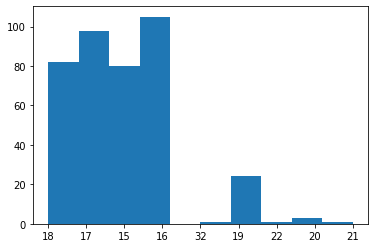

In [259]:
#Data visualisation 
#importing python libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#converting age into an array using Numpy and plotting it using pyplot
age_array = np.array(master_data.select('age').collect())
plt.hist(age_array)
plt.show()

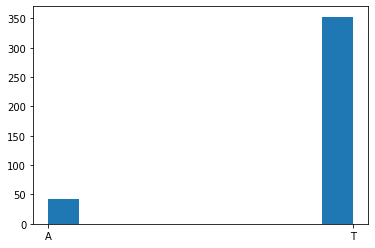

In [260]:
#converting Pstatus into an array using Numpy and plotting it using pyplot
pstatus_array = np.array(master_data.select('Pstatus').collect())
plt.hist(pstatus_array)
plt.show()

In [261]:
#verifying data quality
#finding null values 

from pyspark.sql.functions import col,isnan, when, count
master_data.select([count(when(isnan(x) | col(x).isNull(), x)).alias(x) for x in master_data.columns]).show()

+---+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+------+---+---+-------+-------+-------+----+----+----+----+------+--------+----------+---------+--------+---------+------+
| ID|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G1| G2| G3|school|sex|age|address|famsize|Pstatus|Medu|Fedu|Mjob|Fjob|reason|guardian|traveltime|studytime|failures|schoolsup|famsup|
+---+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+------+---+---+-------+-------+-------+----+----+----+----+------+--------+----------+---------+--------+---------+------+
|  0|   0|         0|      0|     0|       0|       0|     0|       0|    0|   0|   0|     0|       0|  2|  1|  0|     0|  0|  0|      0|      0|      0|   0|   0|   0|   0|     1|       0|         0|        0|       0|        0|     0|
+---+----+----------+-------+------+--------+-------

In [262]:
#dropping na
master_data = master_data.dropna()

In [263]:
#displaying the number of NA in columns after the drop na function
master_data.select([count(when(isnan(y) | col(y).isNull(), y)).alias(y) for y in master_data.columns]).show()

+---+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+------+---+---+-------+-------+-------+----+----+----+----+------+--------+----------+---------+--------+---------+------+
| ID|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G1| G2| G3|school|sex|age|address|famsize|Pstatus|Medu|Fedu|Mjob|Fjob|reason|guardian|traveltime|studytime|failures|schoolsup|famsup|
+---+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+------+---+---+-------+-------+-------+----+----+----+----+------+--------+----------+---------+--------+---------+------+
|  0|   0|         0|      0|     0|       0|       0|     0|       0|    0|   0|   0|     0|       0|  0|  0|  0|     0|  0|  0|      0|      0|      0|   0|   0|   0|   0|     0|       0|         0|        0|       0|        0|     0|
+---+----+----------+-------+------+--------+-------

In [264]:
#viewing number of rows in master dataset after dropping NA values
master_data.select("ID").describe().show()

+-------+------------------+
|summary|                ID|
+-------+------------------+
|  count|               392|
|   mean|198.84438775510205|
| stddev|113.73630726336036|
|    min|                10|
|    max|                99|
+-------+------------------+



In [265]:
#viewing the age column statistics to find out count of rows
master_data.select("age").describe().show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|               392|
|   mean|16.739795918367346|
| stddev|1.4860469400783718|
|    min|                15|
|    max|                32|
+-------+------------------+



In [266]:
#discarding records with student ages over 19 years old
master_data = master_data.filter(master_data.age <= 19)

In [267]:
#viewing the age column statistics to find out count of rows
master_data.select("age").describe().show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|               386|
|   mean|16.650259067357513|
| stddev|1.1949949454800117|
|    min|                15|
|    max|                19|
+-------+------------------+



In [268]:
#viewing unique values in column guardian
master_data.dropDuplicates((["guardian"])).select("guardian").show(truncate=False)

+--------+
|guardian|
+--------+
|father  |
|fathar  |
|mother  |
|other   |
+--------+



In [269]:
#viewing unique values in column address
master_data.dropDuplicates((["address"])).select("address").show(truncate=False)

+-------+
|address|
+-------+
|Urban  |
|U      |
|R      |
|Rural  |
+-------+



In [270]:
#viewing unique values in column traveltime
master_data.dropDuplicates((["traveltime"])).select("traveltime").show(truncate=False)

+----------+
|traveltime|
+----------+
|3         |
|three     |
|1         |
|4         |
|2         |
+----------+



In [271]:
#discarding records with incorrectly typed data for column guardian, address, and traveltime
master_data = master_data.filter((master_data.guardian != "fathar") & (master_data.address != "Urban") & (master_data.address != "Rural") & (master_data.traveltime != "three")) 

In [272]:
#viewing unique values in column guardian
master_data.dropDuplicates((["guardian"])).select("guardian").show(truncate=False)

#viewing unique values in column address
master_data.dropDuplicates((["address"])).select("address").show(truncate=False)

#viewing unique values in column traveltime
master_data.dropDuplicates((["traveltime"])).select("traveltime").show(truncate=False)

+--------+
|guardian|
+--------+
|father  |
|mother  |
|other   |
+--------+

+-------+
|address|
+-------+
|U      |
|R      |
+-------+

+----------+
|traveltime|
+----------+
|3         |
|1         |
|4         |
|2         |
+----------+



In [273]:
#viewing the ID column statistics to find out count of rows
master_data.select("ID").describe().show()

+-------+------------------+
|summary|                ID|
+-------+------------------+
|  count|               379|
|   mean|197.47757255936676|
| stddev|112.54662243064861|
|    min|                10|
|    max|                99|
+-------+------------------+



In [274]:
#Viewing data types to find the columns with data type string
master_data.describe()

DataFrame[summary: string, ID: string, paid: string, activities: string, nursery: string, higher: string, internet: string, romantic: string, famrel: string, freetime: string, goout: string, Dalc: string, Walc: string, health: string, absences: string, G1: string, G2: string, G3: string, school: string, sex: string, age: string, address: string, famsize: string, Pstatus: string, Medu: string, Fedu: string, Mjob: string, Fjob: string, reason: string, guardian: string, traveltime: string, studytime: string, failures: string, schoolsup: string, famsup: string]

In [275]:
#Construction of data

#importing necessary libraries
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder

#numeric indexing for string columns, with index starting from 0
#fitting the indexer model and using it to transform the strings into numeric indices
indexer = StringIndexer(inputCol="school", outputCol="schoolNumericIndex")
master_data = indexer.fit(master_data).transform(master_data)
ohe = OneHotEncoder(inputCol="schoolNumericIndex", outputCol="schoolVector")
master_data = ohe.fit(master_data).transform(master_data)

indexer = StringIndexer(inputCol="sex", outputCol="sexNumericIndex")
master_data = indexer.fit(master_data).transform(master_data)
ohe = OneHotEncoder(inputCol="sexNumericIndex", outputCol="sexVector")
master_data = ohe.fit(master_data).transform(master_data)

indexer = StringIndexer(inputCol="address", outputCol="addressNumericIndex")
master_data = indexer.fit(master_data).transform(master_data)
ohe = OneHotEncoder(inputCol="addressNumericIndex", outputCol="addressVector")
master_data = ohe.fit(master_data).transform(master_data)

indexer = StringIndexer(inputCol="famsize", outputCol="famsizeNumericIndex")
master_data = indexer.fit(master_data).transform(master_data)
ohe = OneHotEncoder(inputCol="famsizeNumericIndex", outputCol="famsizeVector")
master_data = ohe.fit(master_data).transform(master_data)

indexer = StringIndexer(inputCol="Pstatus", outputCol="PstatusNumericIndex")
master_data = indexer.fit(master_data).transform(master_data)
ohe = OneHotEncoder(inputCol="PstatusNumericIndex", outputCol="PstatusVector")
master_data = ohe.fit(master_data).transform(master_data)

indexer = StringIndexer(inputCol="schoolsup", outputCol="schoolsupNumericIndex")
master_data = indexer.fit(master_data).transform(master_data)
ohe = OneHotEncoder(inputCol="schoolsupNumericIndex", outputCol="schoolsupVector")
master_data = ohe.fit(master_data).transform(master_data)

indexer = StringIndexer(inputCol="famsup", outputCol="famsupNumericIndex")
master_data = indexer.fit(master_data).transform(master_data)
ohe = OneHotEncoder(inputCol="famsupNumericIndex", outputCol="famsupVector")
master_data = ohe.fit(master_data).transform(master_data)

indexer = StringIndexer(inputCol="paid", outputCol="paidNumericIndex")
master_data = indexer.fit(master_data).transform(master_data)
ohe = OneHotEncoder(inputCol="paidNumericIndex", outputCol="paidVector")
master_data = ohe.fit(master_data).transform(master_data)

indexer = StringIndexer(inputCol="activities", outputCol="activitiesNumericIndex")
master_data = indexer.fit(master_data).transform(master_data)
ohe = OneHotEncoder(inputCol="activitiesNumericIndex", outputCol="activitiesVector")
master_data = ohe.fit(master_data).transform(master_data)

indexer = StringIndexer(inputCol="nursery", outputCol="nurseryNumericIndex")
master_data = indexer.fit(master_data).transform(master_data)
ohe = OneHotEncoder(inputCol="nurseryNumericIndex", outputCol="nurseryVector")
master_data = ohe.fit(master_data).transform(master_data)

indexer = StringIndexer(inputCol="higher", outputCol="higherNumericIndex")
master_data = indexer.fit(master_data).transform(master_data)
ohe = OneHotEncoder(inputCol="higherNumericIndex", outputCol="higherVector")
master_data = ohe.fit(master_data).transform(master_data)

indexer = StringIndexer(inputCol="internet", outputCol="internetNumericIndex")
master_data = indexer.fit(master_data).transform(master_data)
ohe = OneHotEncoder(inputCol="internetNumericIndex", outputCol="internetVector")
master_data = ohe.fit(master_data).transform(master_data)

indexer = StringIndexer(inputCol="romantic", outputCol="romanticNumericIndex")
master_data = indexer.fit(master_data).transform(master_data)
ohe = OneHotEncoder(inputCol="romanticNumericIndex", outputCol="romanticVector")
master_data = ohe.fit(master_data).transform(master_data)

indexer = StringIndexer(inputCol="Mjob", outputCol="MjobNumericIndex")
master_data = indexer.fit(master_data).transform(master_data)
ohe = OneHotEncoder(inputCol="MjobNumericIndex", outputCol="MjobVector")
master_data = ohe.fit(master_data).transform(master_data)

indexer = StringIndexer(inputCol="Fjob", outputCol="FjobNumericIndex")
master_data = indexer.fit(master_data).transform(master_data)
ohe = OneHotEncoder(inputCol="FjobNumericIndex", outputCol="FjobVector")
master_data = ohe.fit(master_data).transform(master_data)

indexer = StringIndexer(inputCol="reason", outputCol="reasonNumericIndex")
master_data = indexer.fit(master_data).transform(master_data)
ohe = OneHotEncoder(inputCol="reasonNumericIndex", outputCol="reasonVector")
master_data = ohe.fit(master_data).transform(master_data)

indexer = StringIndexer(inputCol="guardian", outputCol="guardianNumericIndex")
master_data = indexer.fit(master_data).transform(master_data)
ohe = OneHotEncoder(inputCol="guardianNumericIndex", outputCol="guardianVector")
master_data = ohe.fit(master_data).transform(master_data)

In [276]:
master_data.show()

+---+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+------------------+-------------+---------------+-------------+-------------------+-------------+-------------------+-------------+-------------------+-------------+---------------------+---------------+------------------+-------------+----------------+-------------+----------------------+----------------+-------------------+-------------+------------------+-------------+--------------------+--------------+--------------------+--------------+----------------+-------------+----------------+-------------+------------------+-------------+--------------------+--------------+
| ID|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G1| G2| G3|school|sex|age|address|famsize|Pstatus|Medu|Fedu|    Mjob|  

In [277]:
#Viewing data types to verify data types
master_data.describe()

DataFrame[summary: string, ID: string, paid: string, activities: string, nursery: string, higher: string, internet: string, romantic: string, famrel: string, freetime: string, goout: string, Dalc: string, Walc: string, health: string, absences: string, G1: string, G2: string, G3: string, school: string, sex: string, age: string, address: string, famsize: string, Pstatus: string, Medu: string, Fedu: string, Mjob: string, Fjob: string, reason: string, guardian: string, traveltime: string, studytime: string, failures: string, schoolsup: string, famsup: string, schoolNumericIndex: string, sexNumericIndex: string, addressNumericIndex: string, famsizeNumericIndex: string, PstatusNumericIndex: string, schoolsupNumericIndex: string, famsupNumericIndex: string, paidNumericIndex: string, activitiesNumericIndex: string, nurseryNumericIndex: string, higherNumericIndex: string, internetNumericIndex: string, romanticNumericIndex: string, MjobNumericIndex: string, FjobNumericIndex: string, reasonNume

In [278]:
#updating datatypes 
from pyspark.sql.types import IntegerType

column_list_to_int = ("ID", "age", "Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "absences", "G1", "G2", "G3")

for z in column_list_to_int:
    master_data = master_data.withColumn(z, master_data[z].cast(IntegerType()))

In [279]:
master_data.dtypes

[('ID', 'int'),
 ('paid', 'string'),
 ('activities', 'string'),
 ('nursery', 'string'),
 ('higher', 'string'),
 ('internet', 'string'),
 ('romantic', 'string'),
 ('famrel', 'int'),
 ('freetime', 'int'),
 ('goout', 'int'),
 ('Dalc', 'int'),
 ('Walc', 'int'),
 ('health', 'int'),
 ('absences', 'int'),
 ('G1', 'int'),
 ('G2', 'int'),
 ('G3', 'int'),
 ('school', 'string'),
 ('sex', 'string'),
 ('age', 'int'),
 ('address', 'string'),
 ('famsize', 'string'),
 ('Pstatus', 'string'),
 ('Medu', 'int'),
 ('Fedu', 'int'),
 ('Mjob', 'string'),
 ('Fjob', 'string'),
 ('reason', 'string'),
 ('guardian', 'string'),
 ('traveltime', 'int'),
 ('studytime', 'int'),
 ('failures', 'int'),
 ('schoolsup', 'string'),
 ('famsup', 'string'),
 ('schoolNumericIndex', 'double'),
 ('schoolVector', 'vector'),
 ('sexNumericIndex', 'double'),
 ('sexVector', 'vector'),
 ('addressNumericIndex', 'double'),
 ('addressVector', 'vector'),
 ('famsizeNumericIndex', 'double'),
 ('famsizeVector', 'vector'),
 ('PstatusNumericIndex

In [280]:
#FINDING OUTLIERS

columns_list_outliers = ("Dalc", "absences", "studytime", "freetime")

bounds = {}
for y in columns_list_outliers:
    quantiles = master_data.approxQuantile(y,[0.25,0.75],0.05)
    IQR= quantiles[1]-quantiles[0]
    
    bounds[y]= [quantiles[0] - 1.5 * IQR, quantiles[1] + 1.5 * IQR]

In [281]:
bounds

{'Dalc': [-0.5, 3.5],
 'absences': [-10.5, 17.5],
 'studytime': [-0.5, 3.5],
 'freetime': [1.5, 5.5]}

In [282]:
outliers = master_data.select(*["ID"] + [
    (
        (master_data[c] < bounds[c][0]) |
        (master_data[c] > bounds[c][1])
    ).alias(c+'_o') for c in columns_list_outliers
])
outliers.show()

+---+------+----------+-----------+----------+
| ID|Dalc_o|absences_o|studytime_o|freetime_o|
+---+------+----------+-----------+----------+
|  2| false|     false|      false|     false|
|  3| false|     false|      false|     false|
|  4| false|     false|      false|     false|
|  5| false|     false|      false|     false|
|  6| false|     false|      false|     false|
|  7| false|     false|      false|     false|
|  8| false|     false|      false|      true|
| 10| false|     false|      false|     false|
| 11| false|     false|      false|     false|
| 12| false|     false|      false|     false|
| 13| false|     false|      false|     false|
| 14| false|     false|      false|     false|
| 15| false|     false|      false|     false|
| 16| false|     false|      false|     false|
| 17| false|     false|      false|     false|
| 19| false|     false|      false|     false|
| 20| false|     false|      false|      true|
| 21| false|     false|      false|     false|
| 22| false| 

In [283]:
master_data = master_data.join(outliers, on ="ID")
master_data.filter("Dalc_o").select("ID", "Dalc").show(379)
master_data.filter("absences_o").select("ID", "absences").show(379)
master_data.filter("studytime_o").select("ID", "studytime").show(379)
master_data.filter("freetime_o").select("ID", "freetime").show(379)

+---+----+
| ID|Dalc|
+---+----+
| 30|   5|
| 55|   4|
| 62|   5|
| 67|   5|
|101|   5|
|160|   4|
|176|   4|
|193|   4|
|212|   4|
|224|   5|
|229|   4|
|237|   5|
|328|   5|
|350|   5|
|370|   4|
|385|   4|
+---+----+

+---+--------+
| ID|absences|
+---+--------+
| 41|      25|
| 75|      54|
| 90|      18|
|104|      26|
|124|      18|
|184|      56|
|199|      24|
|204|      18|
|206|      28|
|217|      22|
|235|      18|
|238|      20|
|261|      21|
|277|      75|
|278|      22|
|281|      30|
|282|      19|
|305|      20|
|308|      38|
|310|      18|
|312|      20|
|314|      22|
|316|      40|
|321|      23|
+---+--------+

+---+---------+
| ID|studytime|
+---+---------+
| 48|        4|
| 67|        4|
| 68|        4|
| 70|        4|
| 71|        4|
| 72|        4|
| 77|        4|
| 78|        4|
| 95|        4|
| 96|        4|
| 99|    10000|
|106|        4|
|107|        4|
|109|        4|
|122|        4|
|141|        4|
|205|        4|
|211|        4|
|257|        4|
|260| 

In [284]:
#discarding outliers
master_data = master_data.filter((master_data.absences < 18) & (master_data.studytime < 5) & (master_data.freetime < 6))

In [285]:
master_data.select("ID").describe().show()

+-------+------------------+
|summary|                ID|
+-------+------------------+
|  count|               353|
|   mean|196.07365439093485|
| stddev| 113.8590397081199|
|    min|                 2|
|    max|               394|
+-------+------------------+



In [286]:
master_data.dtypes

[('ID', 'int'),
 ('paid', 'string'),
 ('activities', 'string'),
 ('nursery', 'string'),
 ('higher', 'string'),
 ('internet', 'string'),
 ('romantic', 'string'),
 ('famrel', 'int'),
 ('freetime', 'int'),
 ('goout', 'int'),
 ('Dalc', 'int'),
 ('Walc', 'int'),
 ('health', 'int'),
 ('absences', 'int'),
 ('G1', 'int'),
 ('G2', 'int'),
 ('G3', 'int'),
 ('school', 'string'),
 ('sex', 'string'),
 ('age', 'int'),
 ('address', 'string'),
 ('famsize', 'string'),
 ('Pstatus', 'string'),
 ('Medu', 'int'),
 ('Fedu', 'int'),
 ('Mjob', 'string'),
 ('Fjob', 'string'),
 ('reason', 'string'),
 ('guardian', 'string'),
 ('traveltime', 'int'),
 ('studytime', 'int'),
 ('failures', 'int'),
 ('schoolsup', 'string'),
 ('famsup', 'string'),
 ('schoolNumericIndex', 'double'),
 ('schoolVector', 'vector'),
 ('sexNumericIndex', 'double'),
 ('sexVector', 'vector'),
 ('addressNumericIndex', 'double'),
 ('addressVector', 'vector'),
 ('famsizeNumericIndex', 'double'),
 ('famsizeVector', 'vector'),
 ('PstatusNumericIndex

In [287]:
#making our column list of features

#importing VectorAssembler and Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

features_vector_list = ('schoolVector', 'sexVector', 'addressVector', 'famsizeVector', 'PstatusVector', 'schoolsupVector', 'famsupVector', 'paidVector', 'activitiesVector', 'nurseryVector', 'higherVector', 'internetVector', 'romanticVector', 'MjobVector', 'FjobVector', 'reasonVector', 'guardianVector', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures')
assembler = VectorAssembler(inputCols = features_vector_list, outputCol = "features")

mining_data_output = assembler.transform(master_data)
mining_data_output.dtypes


[('ID', 'int'),
 ('paid', 'string'),
 ('activities', 'string'),
 ('nursery', 'string'),
 ('higher', 'string'),
 ('internet', 'string'),
 ('romantic', 'string'),
 ('famrel', 'int'),
 ('freetime', 'int'),
 ('goout', 'int'),
 ('Dalc', 'int'),
 ('Walc', 'int'),
 ('health', 'int'),
 ('absences', 'int'),
 ('G1', 'int'),
 ('G2', 'int'),
 ('G3', 'int'),
 ('school', 'string'),
 ('sex', 'string'),
 ('age', 'int'),
 ('address', 'string'),
 ('famsize', 'string'),
 ('Pstatus', 'string'),
 ('Medu', 'int'),
 ('Fedu', 'int'),
 ('Mjob', 'string'),
 ('Fjob', 'string'),
 ('reason', 'string'),
 ('guardian', 'string'),
 ('traveltime', 'int'),
 ('studytime', 'int'),
 ('failures', 'int'),
 ('schoolsup', 'string'),
 ('famsup', 'string'),
 ('schoolNumericIndex', 'double'),
 ('schoolVector', 'vector'),
 ('sexNumericIndex', 'double'),
 ('sexVector', 'vector'),
 ('addressNumericIndex', 'double'),
 ('addressVector', 'vector'),
 ('famsizeNumericIndex', 'double'),
 ('famsizeVector', 'vector'),
 ('PstatusNumericIndex

In [288]:
from pyspark.ml.feature import ChiSqSelector

selector = ChiSqSelector(numTopFeatures=10, featuresCol="features",
                         outputCol="selectedFeatures", labelCol="G3")

result_df = selector.fit(mining_data_output).transform(mining_data_output)

print("ChiSqSelector output with top %d features selected" % selector.getNumTopFeatures())
result_df.show()

ChiSqSelector output with top 10 features selected
+---+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+------------------+-------------+---------------+-------------+-------------------+-------------+-------------------+-------------+-------------------+-------------+---------------------+---------------+------------------+-------------+----------------+-------------+----------------------+----------------+-------------------+-------------+------------------+-------------+--------------------+--------------+--------------------+--------------+----------------+-------------+----------------+-------------+------------------+-------------+--------------------+--------------+------+----------+-----------+----------+--------------------+--------------------+
| ID|paid|activities|nursery|higher|inte

In [289]:
result_df.select("selectedFeatures").show()

+--------------------+
|    selectedFeatures|
+--------------------+
|[1.0,1.0,1.0,1.0,...|
|(10,[0,3,5,7,8,9]...|
|[1.0,1.0,0.0,0.0,...|
|[1.0,1.0,0.0,1.0,...|
|[1.0,1.0,0.0,1.0,...|
|(10,[0,1,2,3,8],[...|
|[1.0,0.0,1.0,1.0,...|
|[1.0,1.0,0.0,1.0,...|
|[1.0,1.0,0.0,1.0,...|
|[1.0,1.0,1.0,1.0,...|
|[1.0,1.0,0.0,1.0,...|
|[1.0,1.0,0.0,1.0,...|
|(10,[0,1,2,8],[1....|
|[1.0,1.0,1.0,1.0,...|
|[1.0,1.0,0.0,1.0,...|
|[1.0,1.0,1.0,1.0,...|
|(10,[0,1,3,7,8],[...|
|[1.0,1.0,1.0,1.0,...|
|(10,[0,1,3,8],[1....|
|[1.0,1.0,1.0,1.0,...|
+--------------------+
only showing top 20 rows



In [290]:
#from pyspark.ml.linalg import Vectors
#from pyspark.ml.stat import ChiSquareTest
#dataset = [[0, Vectors.dense([0, 0, 1])],
           #[0, Vectors.dense([1, 0, 1])],
           #[1, Vectors.dense([2, 1, 1])],
           #[1, Vectors.dense([3, 1, 1])]]
#dataset = spark.createDataFrame(dataset, ["label", "features"])
#chiSqResult = ChiSquareTest.test(dataset, 'features', 'label')
#chiSqResult.select("degreesOfFreedom").collect()[0]

#chiSqResult = ChiSquareTest.test(dataset, 'features', 'label', True)
#row = chiSqResult.orderBy("featureIndex").collect()
#row[0].statistic

#print("predictor_values: " + str(chiSqResult.pValues))

In [291]:
#normalising the data

#importing libraries
from pyspark.ml.feature import Normalizer
from pyspark.ml.linalg import Vectors

#normalizing each vector using l^1 norm (Euclidean norm)
normalizer = Normalizer(inputCol="features", outputCol="normalizedFeatures", p=1.0)
cleaned_NormalizedData = normalizer.transform(mining_data_output)
print("Normalized features")
cleaned_NormalizedData.show()
cleaned_NormalizedData.select("normalizedFeatures").show()

len(cleaned_NormalizedData.dtypes)

Normalized features
+---+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+------------------+-------------+---------------+-------------+-------------------+-------------+-------------------+-------------+-------------------+-------------+---------------------+---------------+------------------+-------------+----------------+-------------+----------------------+----------------+-------------------+-------------+------------------+-------------+--------------------+--------------+--------------------+--------------+----------------+-------------+----------------+-------------+------------------+-------------+--------------------+--------------+------+----------+-----------+----------+--------------------+--------------------+
| ID|paid|activities|nursery|higher|internet|romantic|famrel|freetime|g

+--------------------+
|  normalizedFeatures|
+--------------------+
|[0.01754385964912...|
|(39,[0,1,2,4,9,10...|
|[0.01818181818181...|
|[0.01666666666666...|
|[0.01449275362318...|
|(39,[0,2,4,5,7,9,...|
|[0.01666666666666...|
|[0.01724137931034...|
|[0.01851851851851...|
|[0.01666666666666...|
|[0.01694915254237...|
|[0.01666666666666...|
|(39,[0,2,3,5,6,7,...|
|[0.01612903225806...|
|[0.01587301587301...|
|[0.01176470588235...|
|(39,[0,2,4,5,8,9,...|
|[0.01960784313725...|
|(39,[0,2,3,4,5,6,...|
|[0.01666666666666...|
+--------------------+
only showing top 20 rows



74

In [292]:
#random forest classifier
#importing random forest classifier
from pyspark.ml.classification import RandomForestClassifier

g1_df = cleaned_NormalizedData.select('normalizedFeatures', 'G1')
g2_df = cleaned_NormalizedData.select('normalizedFeatures', 'G2')
g3_df = cleaned_NormalizedData.select('normalizedFeatures', 'G3')

#training data and testing data split
trainingData_g1, testingData_g1 = g1_df.randomSplit([0.7,0.3])
trainingData_g2, testingData_g2 = g2_df.randomSplit([0.7,0.3])
trainingData_g3, testingData_g3 = g3_df.randomSplit([0.7,0.3])

#creating our model
rfc_g1 = RandomForestClassifier(labelCol='G1',featuresCol='normalizedFeatures', numTrees = 64) #grade1_rfc
rfc_g2 = RandomForestClassifier(labelCol='G2',featuresCol='normalizedFeatures', numTrees = 64) #grade2_rfc
rfc_g3 = RandomForestClassifier(labelCol='G3',featuresCol='normalizedFeatures', numTrees = 64) #grade3_rfc

#training our model
rf_model_g1 = rfc_g1.fit(trainingData_g1)
rf_model_g2 = rfc_g2.fit(trainingData_g2)
rf_model_g3 = rfc_g3.fit(trainingData_g3)

#transformation
prediction_rf_model_g1 = rf_model_g1.transform(testingData_g1)
prediction_rf_model_g1.show()

prediction_rf_model_g2 = rf_model_g2.transform(testingData_g2)
prediction_rf_model_g2.show()

prediction_rf_model_g3 = rf_model_g3.transform(testingData_g3)
prediction_rf_model_g3.show()

22/10/13 05:18:29 WARN DAGScheduler: Broadcasting large task binary with size 1086.1 KiB
22/10/13 05:18:29 WARN DAGScheduler: Broadcasting large task binary with size 1333.3 KiB
22/10/13 05:18:34 WARN DAGScheduler: Broadcasting large task binary with size 1099.7 KiB
22/10/13 05:18:35 WARN DAGScheduler: Broadcasting large task binary with size 1346.2 KiB
22/10/13 05:18:40 WARN DAGScheduler: Broadcasting large task binary with size 1112.8 KiB
22/10/13 05:18:41 WARN DAGScheduler: Broadcasting large task binary with size 1390.2 KiB
22/10/13 05:18:43 WARN DAGScheduler: Broadcasting large task binary with size 1466.3 KiB


+--------------------+---+--------------------+--------------------+----------+
|  normalizedFeatures| G1|       rawPrediction|         probability|prediction|
+--------------------+---+--------------------+--------------------+----------+
|(39,[0,1,2,3,4,5,...| 14|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|      11.0|
|(39,[0,1,2,3,4,5,...|  7|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|       8.0|
|(39,[0,1,2,3,4,5,...|  8|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|      12.0|
|(39,[0,1,2,3,4,5,...| 14|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|      15.0|
|(39,[0,1,2,4,5,6,...| 10|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|      10.0|
|(39,[0,1,2,4,5,7,...| 16|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|       8.0|
|(39,[0,1,2,5,9,10...| 10|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|      14.0|
|(39,[0,1,3,5,9,10...| 14|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|      12.0|
|(39,[0,1,4,6,9,10...|  8|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|       7.0|
|(39,[0,2,3,4,5,6,...| 12|[0.0,0.0,0.0,0

22/10/13 05:18:45 WARN DAGScheduler: Broadcasting large task binary with size 1485.8 KiB


+--------------------+---+--------------------+--------------------+----------+
|  normalizedFeatures| G2|       rawPrediction|         probability|prediction|
+--------------------+---+--------------------+--------------------+----------+
|(39,[0,1,2,3,4,5,...| 17|[1.90395804555034...|[0.02974934446172...|      15.0|
|(39,[0,1,2,3,4,5,...| 14|[2.34031187156061...|[0.03656737299313...|      15.0|
|(39,[0,1,2,3,4,5,...| 13|[2.43995251084683...|[0.03812425798198...|       8.0|
|(39,[0,1,2,3,4,6,...| 11|[2.13724302990645...|[0.03339442234228...|      15.0|
|(39,[0,1,2,3,5,6,...|  7|[2.60531194801743...|[0.04070799918777...|      10.0|
|(39,[0,1,2,3,5,8,...|  9|[2.39167149110691...|[0.03736986704854...|      13.0|
|(39,[0,1,2,3,7,9,...| 11|[1.21349116813629...|[0.01896079950212...|      10.0|
|(39,[0,1,2,4,5,8,...|  9|[2.31790844190362...|[0.03621731940474...|      15.0|
|(39,[0,1,2,6,8,9,...|  8|[1.48179784332527...|[0.02315309130195...|      15.0|
|(39,[0,1,4,5,6,9,...| 10|[1.26646382816

22/10/13 05:18:46 WARN DAGScheduler: Broadcasting large task binary with size 1529.4 KiB


In [293]:
## from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


eval_g1 = MulticlassClassificationEvaluator(labelCol = 'G1', predictionCol="prediction", metricName="accuracy")
eval_g2 = MulticlassClassificationEvaluator(labelCol = 'G2', predictionCol="prediction", metricName="accuracy")
eval_g3 = MulticlassClassificationEvaluator(labelCol = 'G3', predictionCol="prediction", metricName="accuracy")

#column_headers_g1 = ['normalizedFeatures','rawPrediction','probability', 'prediction', 'G1']
#column_headers_g2 = ['normalizedFeatures','rawPrediction','probability', 'prediction', 'G2']
#column_headers_g3 = ['normalizedFeatures','rawPrediction','probability', 'prediction', 'G3']

#prediction_rf_model_g1 = prediction_rf_model_g1.select(column_headers_g1)
#prediction_rf_model_g2 = prediction_rf_model_g2.select(column_headers_g2)
#prediction_rf_model_g3 = prediction_rf_model_g3.select(column_headers_g3)

In [294]:
print("RFC")
#binary_eval_g1.evaluate(prediction_rf_model_g1)
#binary_eval_g2.evaluate(prediction_rf_model_g2)
#binary_eval_g3.evaluate(prediction_rf_model_g3)

RFC


In [296]:
g1_acc = eval_g1.evaluate(prediction_rf_model_g1)
g2_acc = eval_g2.evaluate(prediction_rf_model_g2)
g3_acc = eval_g3.evaluate(prediction_rf_model_g3)

22/10/13 05:19:52 WARN DAGScheduler: Broadcasting large task binary with size 1469.4 KiB
22/10/13 05:19:53 WARN DAGScheduler: Broadcasting large task binary with size 1488.8 KiB
22/10/13 05:19:54 WARN DAGScheduler: Broadcasting large task binary with size 1532.4 KiB


In [298]:
print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(g1_acc*100))
print('-'*40)

print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(g2_acc*100))
print('-'*40)

print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(g3_acc*100))
print('-'*40)

A random forest ensemble has an accuracy of: 14.78%
----------------------------------------
A random forest ensemble has an accuracy of: 11.11%
----------------------------------------
A random forest ensemble has an accuracy of: 20.00%
----------------------------------------
